# Credit Card Fraud Detection

### <font color='Grey'> Project Outline 

Detecting fraudulent credit card transactions is quite important and sometimes quite difficult to accurately to detect. This is a classifcation problem where a transaction can either be fraudulent or not, but due to the nature of the problem there is an imbalance between the classes of output because fraudulent transactions happen quite less frequently. The aim of this project is to create a model that is able to perform well with an unbalanced dataset

## <font color='Blue'>1. Dealing with unbalanced data</font>

#### <font color='green'>1.1 Importing and Exploring Dataset</font>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [2]:
#importing dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#printing out dataset dimensions 
data_row = data.shape[0]
data_col = data.shape[1]
print('The data set has', data_row, 'rows and', data_col,'columns' )

The data set has 284807 rows and 31 columns


In [4]:
#spltting independent and dependent variables
X = data.drop(columns = ['Class'])
y = data['Class']

<AxesSubplot:xlabel='Class', ylabel='count'>

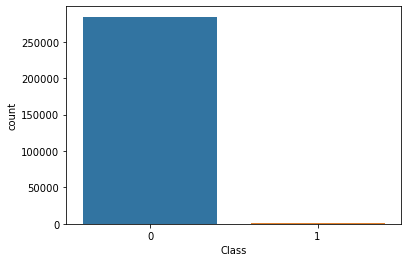

In [5]:
#checking imbalance in the output (y) class
sns.countplot(x = data['Class'], data = data)

In [6]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There is a very high imbalance between non-fraudulent (284315) and fraudulent (492) transactions. To deal with this many under-sampling and over-sampling techniques can be used.

#### <font color='green'>1.2 Running Model on unbalanced dataset</font>

In [7]:
#importing model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [8]:
#creating instance of model
log_reg = LogisticRegression(max_iter=10000)

In [9]:
#running 4 fold cross validation using f1-score as scoring parameter
unbalanced_score = cross_val_score(log_reg, X, y, scoring = 'f1', cv = 4)

In [10]:
#finding average f1-score
print(unbalanced_score.mean())

0.48715694388484393


Running a model on the unbalanced dataset gives a very poor performance with an average f1-score of 0.55

#### <font color='green'>1.2 Undersampling</font>

In [11]:
#importing and creating undersampler instance
from imblearn.under_sampling import NearMiss
nm = NearMiss()

In [12]:
#fitting data to undersample
X_under, y_under = nm.fit_resample(X,y)

In [13]:
print('X originally had', X.shape[0], 'observations but now X has', X_under.shape[0],'observations')

X originally had 284807 observations but now X has 984 observations


In [14]:
print(y_under.value_counts())

0    492
1    492
Name: Class, dtype: int64


The data has been undersampled where both classes now have equal number of observations

In [15]:
#running same model on undersampled dataset
undersam_score = cross_val_score(log_reg, X_under, y_under, scoring = 'f1', cv = 4)

In [16]:
print(undersam_score.mean())

0.9425217088026645


Using undersampling gives a much better performance at an f-1 score of 0.94

#### <font color='green'>1.3 Random Oversampling</font>

In [17]:
#importing and creating oversampler
from imblearn.over_sampling import RandomOverSampler
oversam = RandomOverSampler()

In [18]:
#oversampling the data
X_over, y_over = oversam.fit_resample(X,y)

In [19]:
print('X originally had', X.shape[0], 'observations but now X has', X_over.shape[0],'observations')

X originally had 284807 observations but now X has 568630 observations


In [20]:
print(y_over.value_counts())

0    284315
1    284315
Name: Class, dtype: int64


The data has been oversampled where both classes now again have equal number of observations but this time the number of observations equal the majority class i.e. both classes equal to 284315 observations

In [21]:
#running model on oversampled data
oversam_score = cross_val_score(log_reg, X_over,y_over, scoring= 'f1', cv = 4)

In [22]:
#getting average f-1 score for random oversampling
print(oversam_score.mean())

0.9196437979893116


Random oversampling has an average f1-score of 0.917 and performs much better than the imbalanced data but performs worse than undersampling

#### <font color='green'>1.4 SMOTE</font>

In [23]:
#importing and creating SMOTE instance
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [24]:
#fitting data to SMOTE
X_smote, y_smote = smote.fit_resample(X,y)

In [25]:
print('X originally had', X.shape[0], 'observations but now X has', X_smote.shape[0],'observations')

X originally had 284807 observations but now X has 568630 observations


In [26]:
print(y_smote.value_counts())

0    284315
1    284315
Name: Class, dtype: int64


As SMOTE is also an oversampling technique the number of observations of the minority class is increased to match the number of observation of the majority class 

In [27]:
#running the model
smote_score = cross_val_score(log_reg, X_smote,y_smote, scoring= 'f1', cv = 4)

In [28]:
#getting average f1-score
print(smote_score.mean())

0.9675340350575334


Oversampling using SMOTE gives the best average f1-score at 0.966 beating both undersampling and Random oversampling

## <font color='Blue'>2. Modeling</font>

Using SMOTE and 3 splits (validation, train and test) on mutiple classification models like Logistic Regression, Random Forest, SVM and xGBoost 

In [29]:
#import and create data splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

In [30]:
print(y_test.value_counts())
print(y_train.value_counts())

0    142158
1       246
Name: Class, dtype: int64
0    142157
1       246
Name: Class, dtype: int64


Both classes have equal number of the minority class (fraudulent transactions) 

In [31]:
#applying SMOTE to train split
X_train, y_train = smote.fit_resample(X_train, y_train)

In [32]:
print(y_train.value_counts())

0    142157
1    142157
Name: Class, dtype: int64


Oversampled validation split using SMOTE so that data is balanced across both classes

#### <font color='green'>2.2 Logistic Regression</font>

In [44]:
#import model and create instance
lr = LogisticRegression()

In [45]:
#fit training data to model
lr.fit(X_train, y_train)

LogisticRegression()

In [46]:
#calculate y using X_test
y_lr = lr.predict(X_test)

In [56]:
#classification report, f1_score
print('F1-score of LR is', f1_score(y_test,y_lr))
print(classification_report(y_test, y_lr))

F1-score of LR is 0.08236615499812804
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    142158
           1       0.04      0.89      0.08       246

    accuracy                           0.97    142404
   macro avg       0.52      0.93      0.53    142404
weighted avg       1.00      0.97      0.98    142404



<AxesSubplot:>

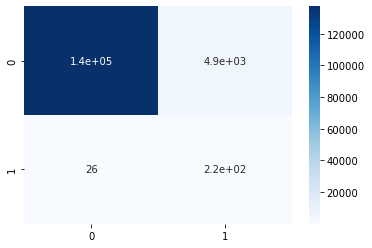

In [49]:
#confusion matrix
cf_matrix = confusion_matrix(y_test,y_lr)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

#### <font color='green'>2.3 Random Forest Classifier</font>

In [35]:
#importing model and creating instance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [36]:
#fit training data to model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
#calculating y using fitted model
y_rf = rf.predict(X_test)

In [42]:
#classification report, f1_score
print('F1-score of RF is', f1_score(y_test,y_rf))
print(classification_report(y_test, y_rf))

F1-score of RF is 0.8583333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.88      0.84      0.86       246

    accuracy                           1.00    142404
   macro avg       0.94      0.92      0.93    142404
weighted avg       1.00      1.00      1.00    142404



<AxesSubplot:>

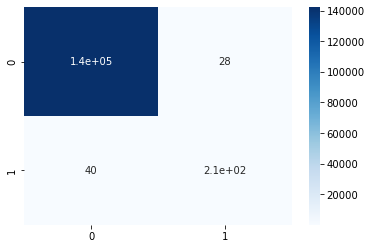

In [43]:
#confusion matrix
cf_matrix = confusion_matrix(y_test,y_rf)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

#### <font color='green'>2.4 xGBoost Classifier</font>

In [50]:
#importing xgb classifier
import xgboost as xgb
xgbc = xgb.XGBClassifier()

In [51]:
#fitting data into model
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
#calculating y using fitted model
y_xgb = xgbc.predict(X_test)

In [53]:
#classification report, f1_score
print('F1-score of XGB Classifier is', f1_score(y_test,y_xgb))
print(classification_report(y_test, y_xgb))

F1-score of XGB Classifier is 0.860082304526749
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    142158
           1       0.87      0.85      0.86       246

    accuracy                           1.00    142404
   macro avg       0.94      0.92      0.93    142404
weighted avg       1.00      1.00      1.00    142404



<AxesSubplot:>

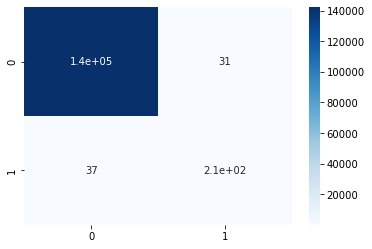

In [55]:
#confusion matrix
cf_matrix = confusion_matrix(y_test,y_xgb)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

Logistic regression still has poor performance with an F1-score of just 0.08 but both Random Forest and XgBoost perform very well after training on SMOTE data with F1-score of 0.858 and 0.860 repectivelly 